In [1]:
# import multi tracker analysis
import multi_tracker_analysis as mta

In [7]:
# load hdf5 data as a pandas dataframe, and load the configuration
# change the argument to match your data path!
pd, config = mta.read_hdf5_file_to_pandas.load_and_preprocess_data('/home/lab/demo/demo_1/data/20170711_184514_N1_trackedobjects.hdf5')

/usr/local/lib/python2.7/dist-packages/pandas-0.20.3-py2.7-linux-x86_64.egg/pandas/core/dtypes/dtypes.py:150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


Preprocessing data - see config file for details!
[]
Found too many, or too few files
No delete cut join instructions found in path!


In [9]:
# pandas dataframe structure: each row is a measurement corresponding to one of the objects for each frame
pd.keys()

Index([u'angle', u'area', u'frames', u'measurement_x', u'measurement_y',
       u'objid', u'position_x', u'position_y', u'time_epoch_nsecs',
       u'time_epoch_secs', u'velocity_x', u'velocity_y', u'time_epoch',
       u'speed'],
      dtype='object')

In [11]:
# show the object id's
import numpy as np
np.unique(pd.objid)

array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  13,  14,
        15,  17,  18,  19,  20,  51,  52,  53,  54,  55,  56,  58,  60,
        61,  62,  63,  64,  66,  68,  69,  71,  74,  90,  91,  95,  98,
        99, 104, 124, 128, 130, 135, 136, 138, 139, 141, 142, 143, 144,
       146, 148, 150, 153, 159, 160, 161, 163, 164, 167, 168, 169, 180,
       183, 185, 186, 197])

In [12]:
position_for_10 = pd[pd.objid==10].position_x.values
position_for_10

array([ 188.        ,  188.        ,  188.27042802,  188.66477151,
        188.47877873,  188.77957926,  188.96559366,  189.07832097,
        189.14583484,  189.53657476,  189.81366533,  190.0086658 ,
        190.14190899,  190.22745389,  190.27589463,  190.29583718,
        190.29457974,  190.27836078,  190.55578657,  190.7724962 ,
        191.23912506,  191.60430052,  191.87945396,  192.07735914,
        192.21102952,  192.29293425,  192.33448963,  192.3457696 ,
        192.33538075,  192.31045509,  192.27672332,  192.23863936,
        191.89572926,  191.6097311 ,  191.68224546,  191.44569738,
        191.56129344,  191.96872324,  192.30679742,  192.88254678,
        193.64615362,  194.24921992,  195.01249483,  195.59599761,
        196.32735249,  196.87201718,  197.56176711,  198.0650962 ,
        198.4120781 ,  198.63190064,  199.05539592,  199.34730951,
        199.83601268,  200.18490104,  200.41803926,  200.86209059,
        201.48231743,  201.94143733,  202.87176887,  203.88280

In [13]:
# wrap pandas dataframe into a dataset object for intuitive processing
# note: using copy=True creates a copy of the data
#       this allows you to add attributes to trajecties and pickle the dataset structure for future use
dataset = mta.read_hdf5_file_to_pandas.Dataset(pd, config=config)
dataset.load_keys() # load the object ids
trajec = dataset.trajec(dataset.keys[7]) # load the 7th trajectory
trajec.position_x # show the position x data

array([ 106.        ,  106.        ,  106.        , ...,  622.31690589,
        621.83675253,  621.658309  ])

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

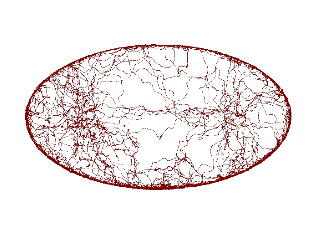

In [28]:
# plot the trajectory; this requires downloading my plotting library: https://github.com/florisvb/FlyPlotLib
# make a heatmap of the trajectories
bgimg = mta.plot.get_filename(config.path, 'bgimg')
binsx, binsy = mta.plot.get_bins_from_backgroundimage(bgimg)
mta.plot.plot_trajectories(pd, binsx, binsy)

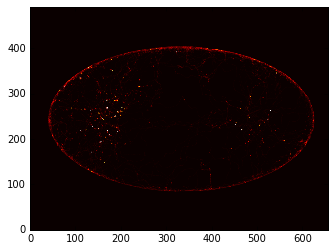

In [27]:
mta.plot.plot_heatmap(pd, binsx, binsy)